In [4]:
import pandas as pd

file_name = "train_FD002.txt"

column_names = ['engine_id', 'time_in_cycles', 'setting1', 'setting2', 'setting3'] + \
               [f'sensor{i}' for i in range(1, 22)]  # sensors 1 through 21


df = pd.read_csv(file_name, sep=r'\s+', header=None, names=column_names)

df.head()

,engine_id,time_in_cycles,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


## RemaningUsefulLife

In [7]:
# find last cycle for each engine
rul_per_eng = df.groupby('engine_id')['time_in_cycles'].max()

# new column with every engine's max cycle (for every row)
df['max_cycle'] = df['engine_id'].map(rul_per_eng)

# remaining life = max cy - current cy
df['RUL'] = df['max_cycle'] - df['time_in_cycles']

# remove max_cycle col --> not needed
df.drop(columns=['max_cycle'], inplace=True)

#### Prediction Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import numpy as np

# dont need id & time cols
features = df.drop(columns=['engine_id', 'time_in_cycles', 'RUL'])

# target variable
target = df['RUL']

# train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [10]:
# train random for regr

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# predict on test data
y_pred = model.predict(X_test)

# eval metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #root mean sqrd err

print(f"MAE: {mae: .2f}")
print(f"RMSE: {rmse: .2f}")

MAE:  31.84
RMSE:  43.41


In [16]:
# loading test data set
test_name = "test_FD002.txt"

column_names = ['engine_id', 'time_in_cycles', 'setting1', 'setting2', 'setting3'] + \
[f'sensor{i}' for i in range(1,22)]

test_df = pd.read_csv(test_name, sep=r'\s+', header=None, names=column_names)
test_df.head()

,engine_id,time_in_cycles,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740


In [17]:
# get last row for each eng in test set
latest_tst_cyc = test_df.groupby('engine_id').last().reset_index()
latest_tst_cyc.head()

,engine_id,time_in_cycles,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,258,10.0076,0.2501,100.0,489.05,605.42,1515.00,1325.07,10.52,...,370.87,2388.32,8167.06,8.7456,0.03,371,2319,100.0,28.30,17.0934
1,2,55,0.0018,0.0000,100.0,518.67,642.67,1591.67,1418.17,14.62,...,521.10,2388.12,8138.12,8.4248,0.03,393,2388,100.0,38.82,23.3463
2,3,165,35.0015,0.8412,100.0,449.44,555.86,1370.62,1135.59,5.48,...,183.11,2388.07,8071.23,9.3094,0.02,332,2223,100.0,14.75,8.9589
3,4,86,20.0032,0.7000,100.0,491.19,607.99,1487.94,1257.49,9.35,...,314.88,2388.12,8062.39,9.2349,0.02,365,2324,100.0,24.22,14.6814
4,5,148,42.0055,0.8400,100.0,445.00,550.81,1358.95,1140.34,3.91,...,130.82,2389.06,8140.94,9.3964,0.02,333,2212,100.0,10.34,6.3601


In [18]:
# drop columns that the model wasnt trained on
X_real_test = latest_tst_cyc.drop(columns=['engine_id', 'time_in_cycles'])

# predict rul
y_real_pred = model.predict(X_real_test)

In [19]:
# real RULs for the test engines (txt file provided by NASA)

true_rul_name = "RUL_FD002.txt"
true_rul = pd.read_csv(true_rul_name, header=None, names=['true_RUL'])

## Predictions vs Actual RUL comparison

In [24]:
import matplotlib.pyplot as plt
#import numpy as np
#from sklearn.metrics import mean_absolute_error, mean_squared_error

# convert pred to data frame
pred_df = pd.DataFrame({
    'predicted_RUL': y_real_pred,
    'true_RUL': true_rul['true_RUL']
})

# calc metrics
mae_comparison = mean_absolute_error(pred_df['true_RUL'], pred_df['predicted_RUL'])
rmse_comparison = np.sqrt(mean_squared_error(pred_df['true_RUL'], pred_df['predicted_RUL']))

print(f"Real Test MAE: {mae_comparison:.2f}")
print(f"Real Test RMSE: {rmse_comparison: .2f}")

Real Test MAE: 23.28
Real Test RMSE:  31.54


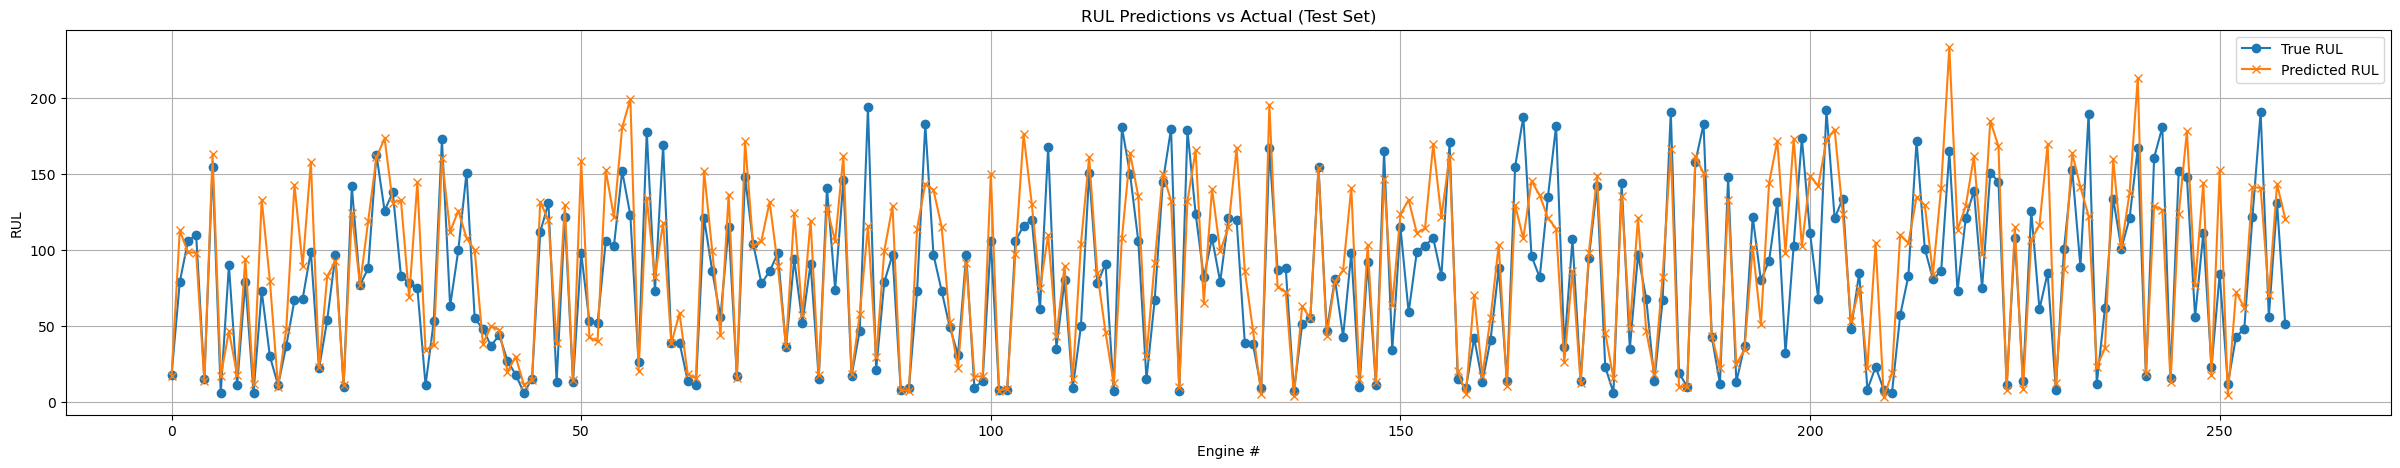

In [30]:
# plot

plt.figure(figsize=(30,5))
plt.plot(pred_df['true_RUL'].values, label = "True RUL", marker='o')
plt.plot(pred_df["predicted_RUL"].values, label = "Predicted RUL", marker='x')
plt.title("RUL Predictions vs Actual (Test Set)")
plt.xlabel("Engine #")
plt.ylabel("RUL")
plt.legend()
plt.grid(True)
plt.savefig("RUL_pred_v_actual_30x5.png")
plt.show()

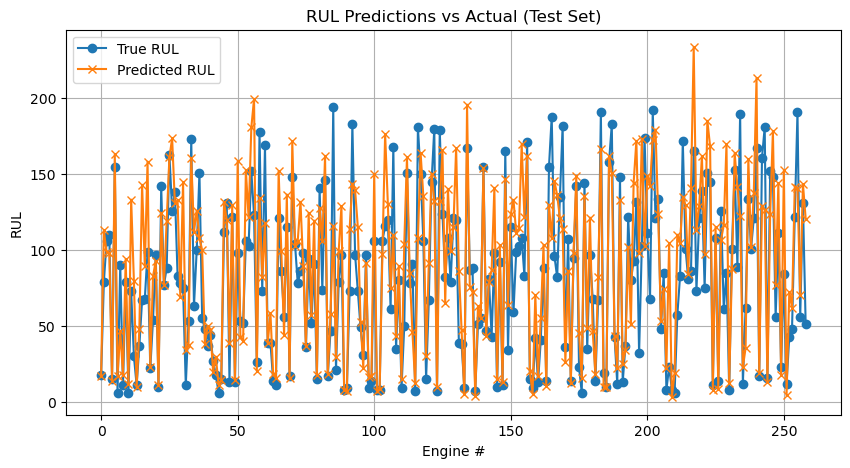

In [31]:

plt.figure(figsize=(10,5))
plt.plot(pred_df['true_RUL'].values, label = "True RUL", marker='o')
plt.plot(pred_df["predicted_RUL"].values, label = "Predicted RUL", marker='x')
plt.title("RUL Predictions vs Actual (Test Set)")
plt.xlabel("Engine #")
plt.ylabel("RUL")
plt.legend()
plt.grid(True)
plt.savefig("RUL_pred_v_act_10x3.png")
plt.show()